In [1]:
#Update seaborn 
!pip install --upgrade seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from numpy import arange

print(sns.__version__)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Print all columns in a dataframe
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV



0.13.2


In [3]:
#Read the csv file and preview the data
house_df=pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.shape

(1460, 81)

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Understand the data
<ul>
 <li>Datatypes</li>
 <li>Null values</li>
 <li>Unique non-null values</li>
 </ul>
    

In [7]:
# Check the counts, datatype, unique count and percentage of missing records
missingRowPercCol = []
for col in house_df.columns:
        missingRowPerc = 100-(house_df[col].count()*100)/house_df['Id'].count()
        missingRowPercwithZeros = (house_df[house_df[col]==0][col].count())*100/house_df['Id'].count()
        print(col,'|', house_df[col].dtype, '|',house_df[col].isnull().sum(), '|', house_df[col].nunique(dropna=True), '|', missingRowPerc)
        if (house_df[col].nunique(dropna=True) < 5):
            print("Value counts of column whose unique values count is less than 5 - ")
            print(house_df[col].value_counts())
        if(missingRowPerc > 90 or missingRowPercwithZeros > 90):
            print("Missing column with more than 90% - ",col)
            missingRowPercCol.append(col)
       

Id | int64 | 0 | 1460 | 0.0
MSSubClass | int64 | 0 | 15 | 0.0
MSZoning | object | 0 | 5 | 0.0
LotFrontage | float64 | 259 | 110 | 17.739726027397253
LotArea | int64 | 0 | 1073 | 0.0
Street | object | 0 | 2 | 0.0
Value counts of column whose unique values count is less than 5 - 
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley | object | 1369 | 2 | 93.76712328767124
Value counts of column whose unique values count is less than 5 - 
Grvl    50
Pave    41
Name: Alley, dtype: int64
Missing column with more than 90% -  Alley
LotShape | object | 0 | 4 | 0.0
Value counts of column whose unique values count is less than 5 - 
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour | object | 0 | 4 | 0.0
Value counts of column whose unique values count is less than 5 - 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities | object | 0 | 2 | 0.0
Value counts of column whose unique values count is less than 5 - 
AllPub    

In [8]:
#Adding new features
house_df['HouseAgeInYears'] = house_df['YrSold'] - house_df['YearBuilt']
house_df['YearsBetweenModelledAndSold'] = house_df['YrSold'] - house_df['YearRemodAdd']
house_df['TotalPorchArea'] = house_df['OpenPorchSF'] + house_df['EnclosedPorch']  + house_df['ScreenPorch'] + house_df['3SsnPorch']
house_df['TotalLivingAreaSF'] = house_df['GrLivArea'] + house_df['TotalBsmtSF']  



In [9]:
print(missingRowPercCol)

['Alley', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal']


In [10]:
#Dropping Street as 99% of values in Street, Utilities are same, 
#Dropping ID has a identity columns and is unique across
house_df=house_df.drop(['Id', 'Street', 'Utilities'], axis=1)
#Dropping 'Alley', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal' as 90% of values are not populated
house_df=house_df.drop(missingRowPercCol, axis=1)

house_df = house_df.drop(['OpenPorchSF','EnclosedPorch' ], axis =1)

#Dropping 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF' as 'TotalBsmtSF' is sum of these
house_df = house_df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF' ], axis =1)

#Dropping '1stFlrSF', 'LowQualFinSF', '2ndFlrSF' as 'GrLivArea' is sum of these
house_df = house_df.drop(['1stFlrSF','2ndFlrSF' ], axis =1)

In [11]:
#Check which columns has NA values
NAColList = house_df.columns[house_df.isna().any()].tolist()
for col in NAColList:
    if(house_df[col].dtype != 'object'):
        print("Number columns which has NA values is {0}".format(col))
    else:
        print("Object columns which has NA values is {0}".format(col))
  

Number columns which has NA values is LotFrontage
Object columns which has NA values is MasVnrType
Number columns which has NA values is MasVnrArea
Object columns which has NA values is BsmtQual
Object columns which has NA values is BsmtCond
Object columns which has NA values is BsmtExposure
Object columns which has NA values is BsmtFinType1
Object columns which has NA values is BsmtFinType2
Object columns which has NA values is Electrical
Object columns which has NA values is FireplaceQu
Object columns which has NA values is GarageType
Number columns which has NA values is GarageYrBlt
Object columns which has NA values is GarageFinish
Object columns which has NA values is GarageQual
Object columns which has NA values is GarageCond
Object columns which has NA values is Fence


In [12]:
#Filling NA with default values
house_df['LotFrontage']=house_df['LotFrontage'].fillna(0)
house_df['MasVnrArea']=house_df['MasVnrArea'].fillna(0)

#Filling missing values
house_df['GarageYrBlt']=house_df.GarageYrBlt.fillna(house_df["GarageYrBlt"].median()).astype(int)


In [13]:
#Get SalePrice as first column
SalePrice=house_df.pop('SalePrice')
house_df.insert(0,'SalePrice',SalePrice)
house_df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,MoSold,YrSold,SaleType,SaleCondition,HouseAgeInYears,YearsBetweenModelledAndSold,TotalPorchArea,TotalLivingAreaSF
0,208500,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,1710,1,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,NaN,2,2008,WD,Normal,5,5,61,2566
1,181500,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,NaN,5,2007,WD,Normal,31,31,0,2524
2,223500,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,1786,1,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,NaN,9,2008,WD,Normal,7,6,42,2706
3,140000,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,1717,1,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,NaN,2,2006,WD,Abnorml,91,36,307,2473
4,250000,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,2198,1,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,NaN,12,2008,WD,Normal,8,8,84,3343


<Axes: xlabel='SalePrice', ylabel='Density'>

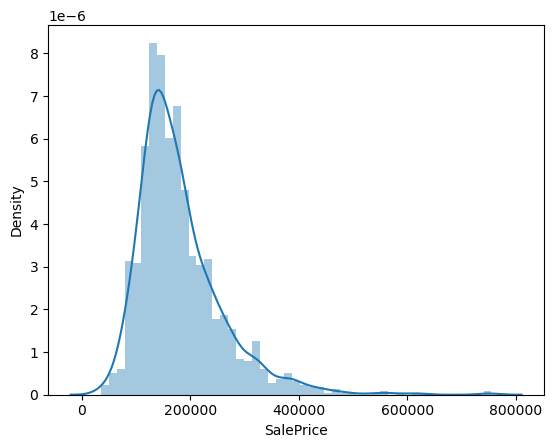

In [14]:
#check the distribution of SalePrice
sns.distplot(house_df['SalePrice'])

In [15]:
#Log Transformation since the SalePrice is left skewed
house_df['SalePrice']=np.log1p(house_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

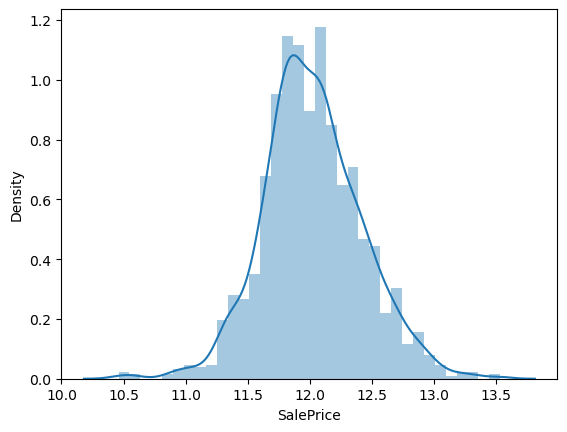

In [16]:
#check the distribution of SalePrice
sns.distplot(house_df['SalePrice'])

In [17]:
#Defining reusable function to plot categorical values against SalePrice
def plot(catvar, position, vtype='numeric', ylabel='SalePrice'):
    plt.figure(figsize=(20,100))
    plt.subplot(25,2,position)
    if vtype == 'numeric':
        sns.scatterplot(data=house_df,x=catvar, y=ylabel )
    else:
        sns.boxplot(x=catvar, y=ylabel, data=house_df)
    plt.xlabel(catvar)
    plt.ylabel(ylabel)
    plt.title(catvar+" vs "+ylabel)
    return plt 




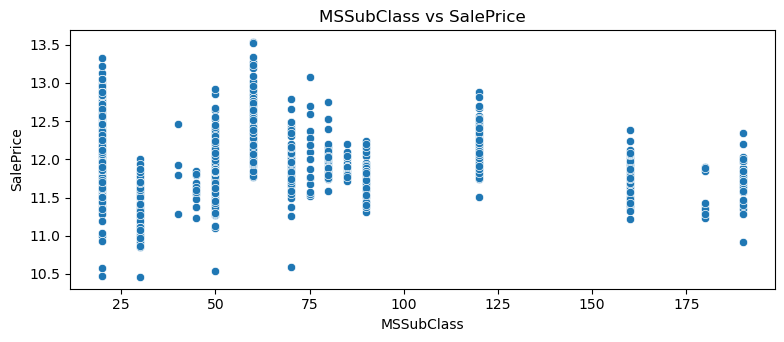

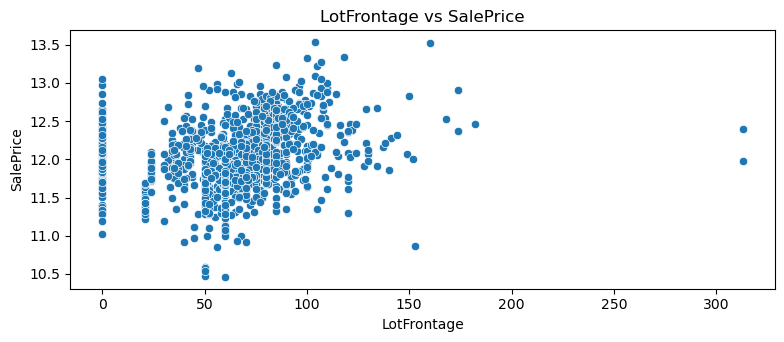

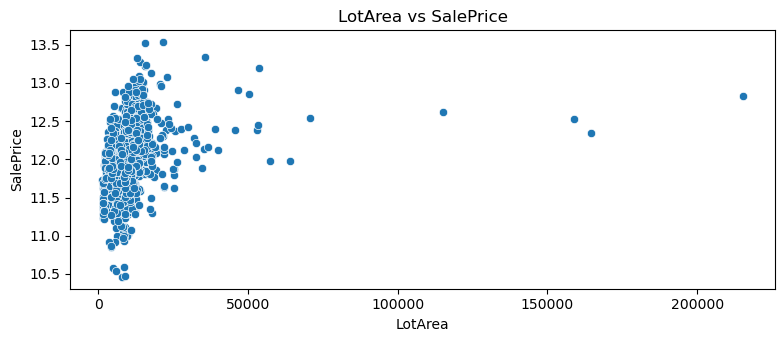

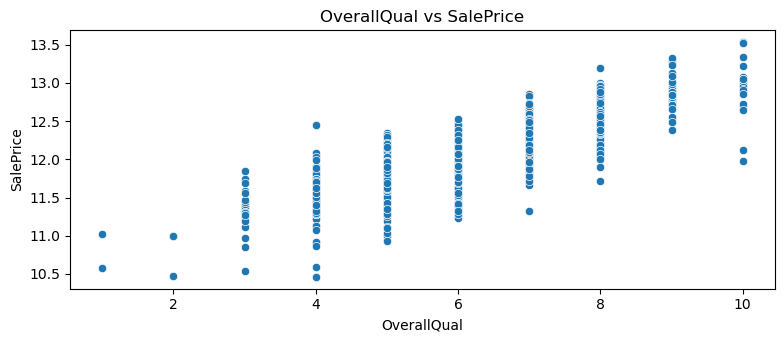

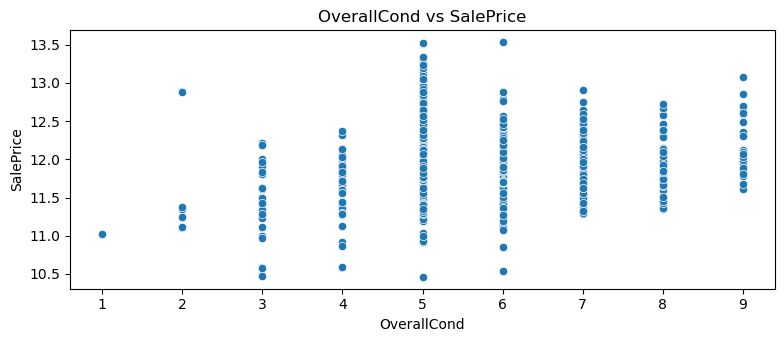

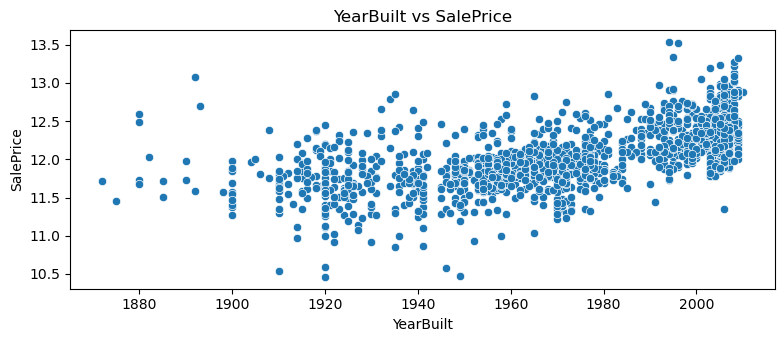

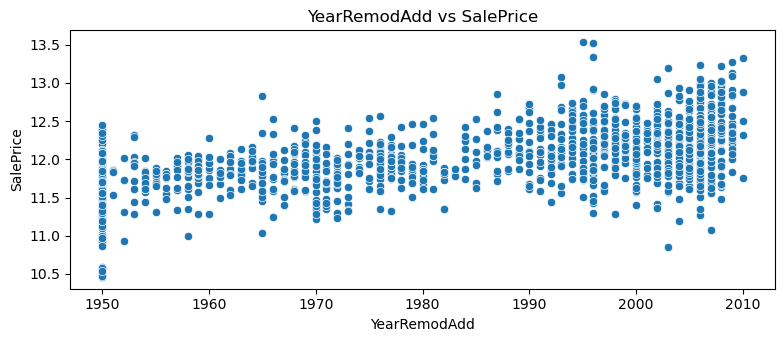

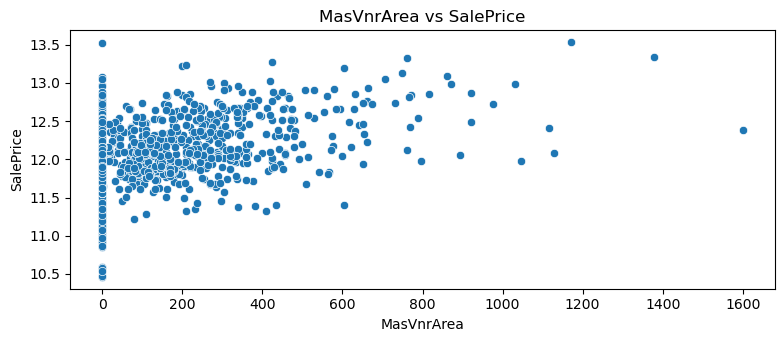

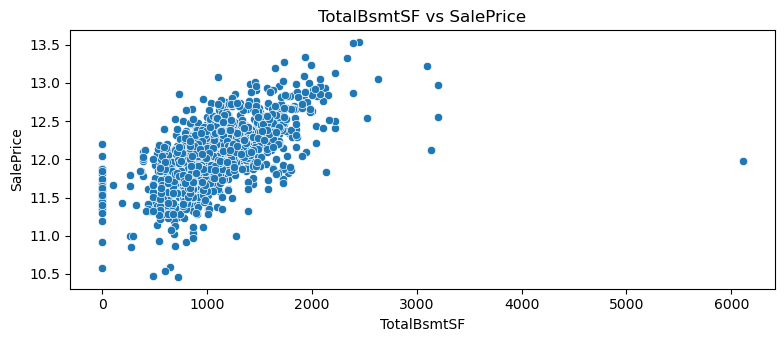

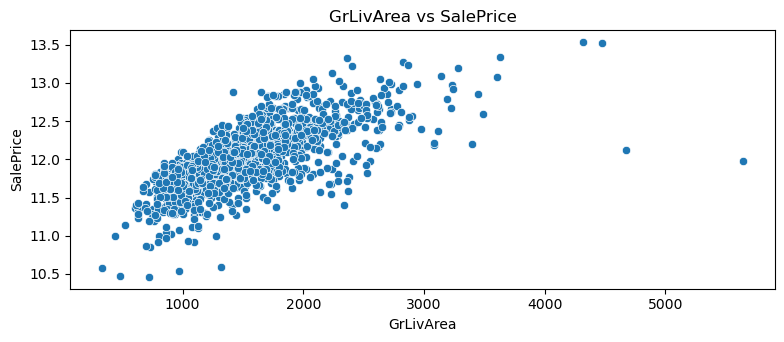

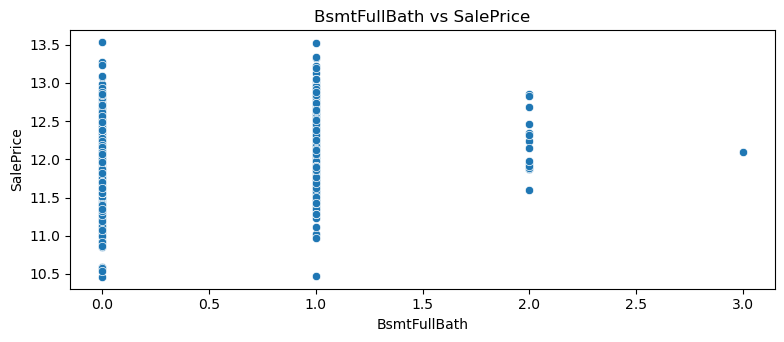

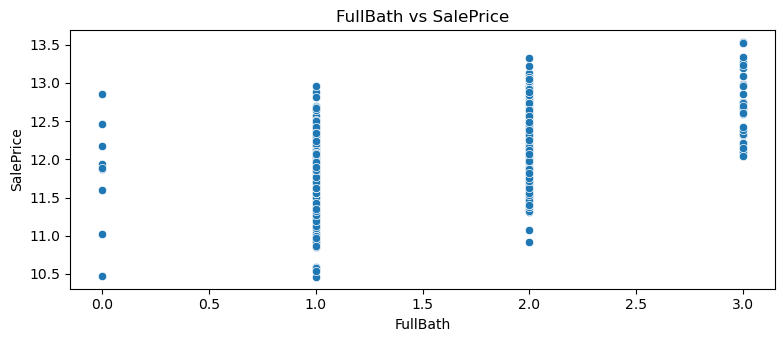

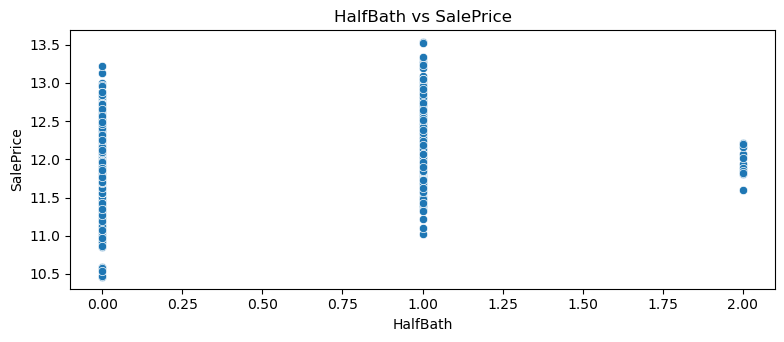

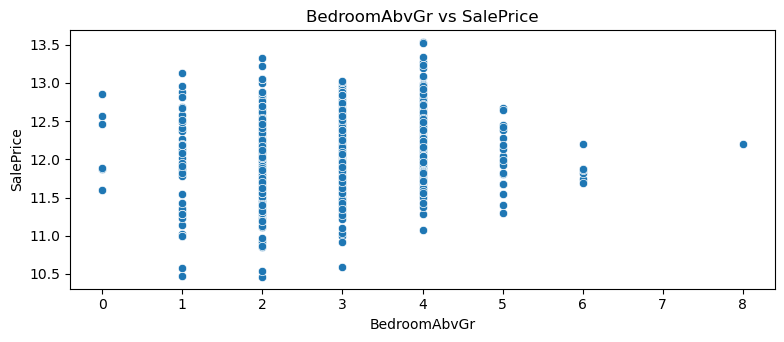

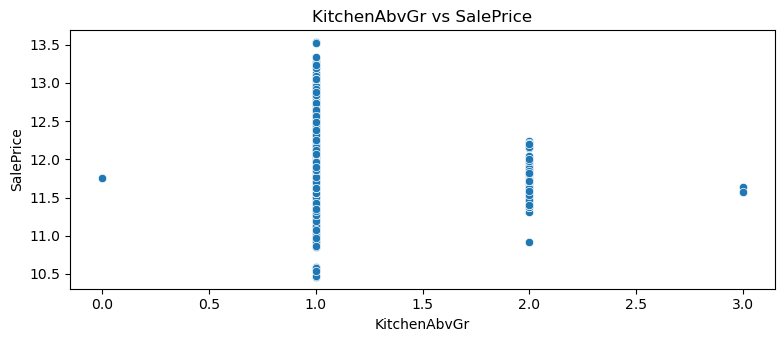

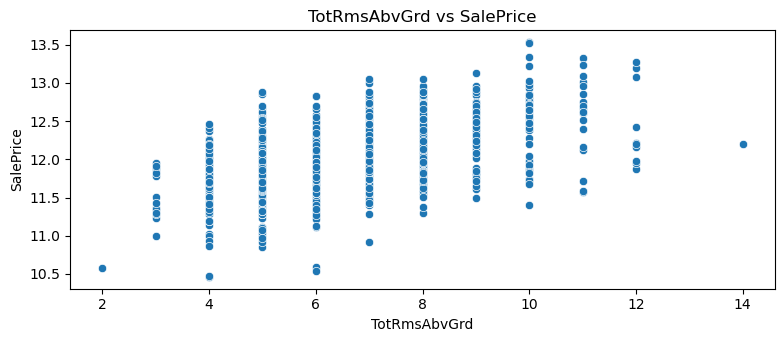

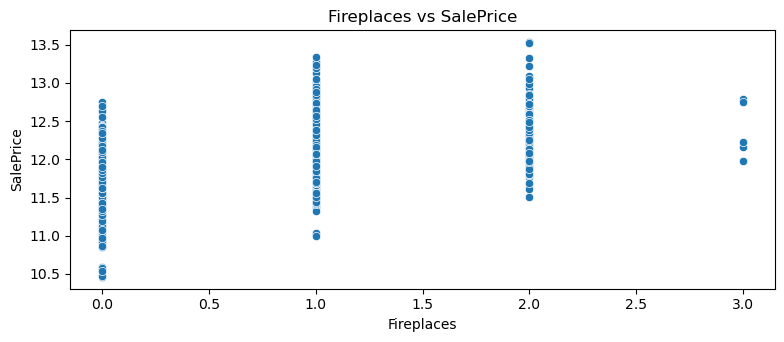

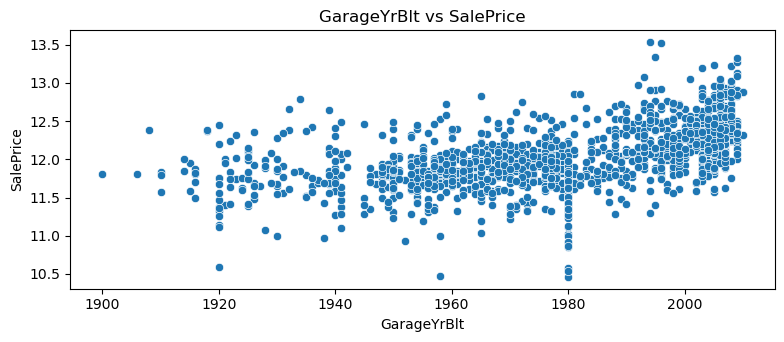

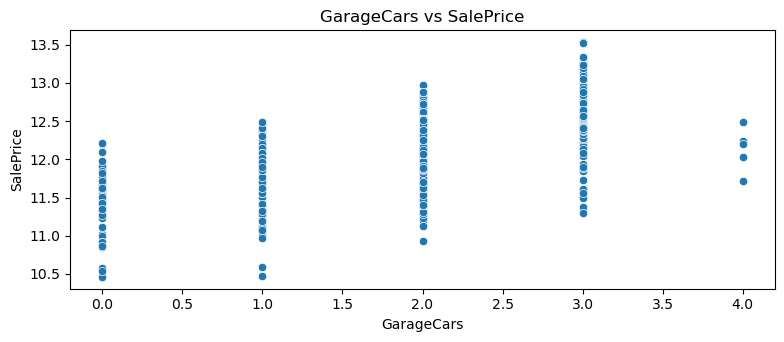

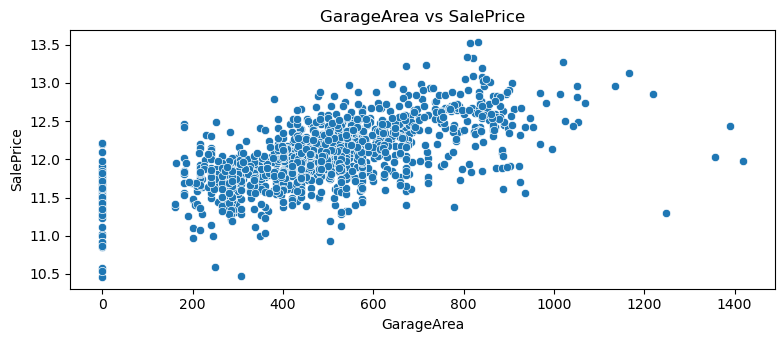

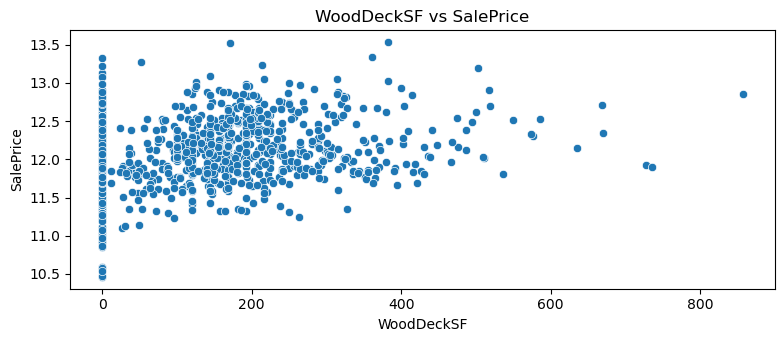

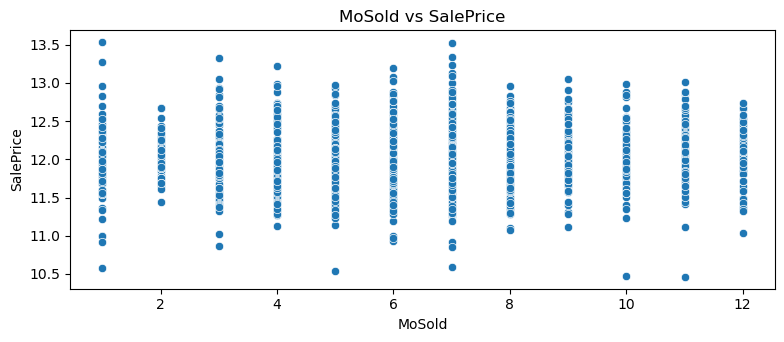

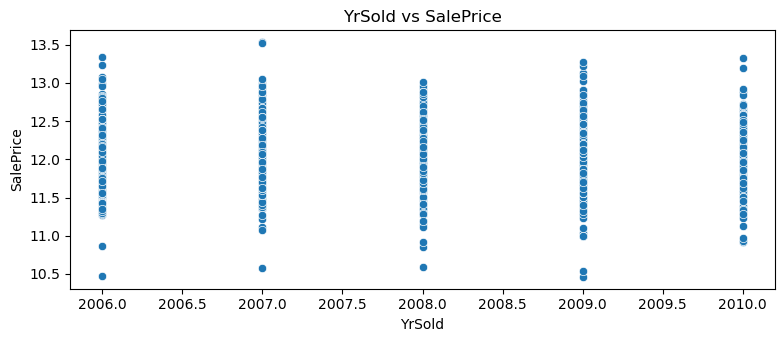

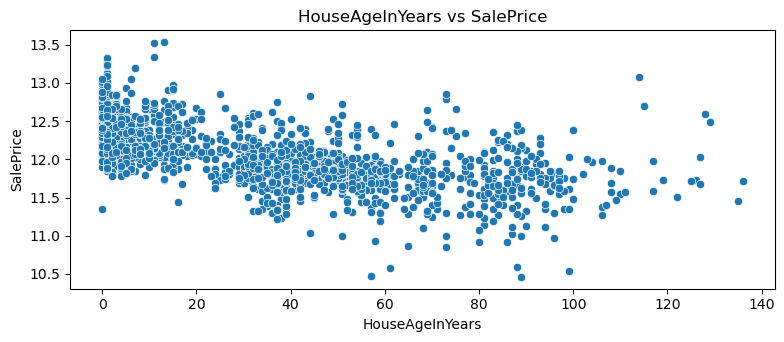

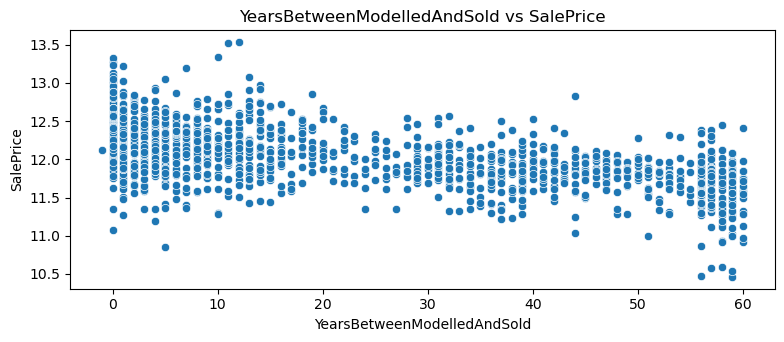

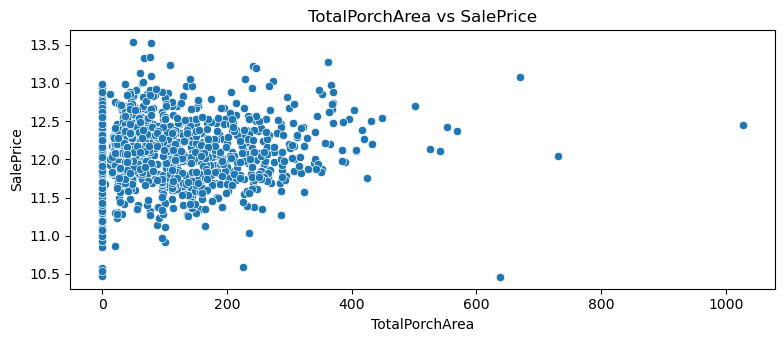

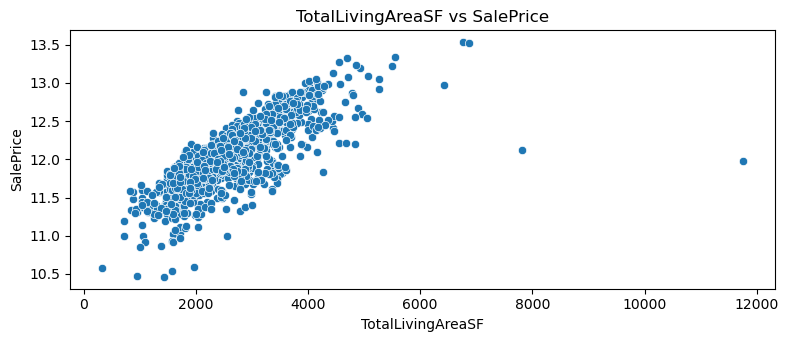

In [18]:
#Visualizing numerical variables as scatter plots
i=1
for col in house_df.columns:
    if(house_df[col].dtype!='object' and col!='SalePrice'):
        plt=plot(col, i, 'numeric')
        i=i+1
plt.show()

In [19]:
#Dropping rows with outliers
house_df.drop(house_df[(house_df['YearBuilt'] < 1900) & (house_df['SalePrice'] > 200000)].index,inplace=True)
house_df.drop(house_df[(house_df['LotFrontage']> 200) ].index,inplace=True)
house_df.drop(house_df[(house_df['OverallQual'] == 4)  & (house_df['SalePrice'] > 200000)].index,inplace=True)
house_df.drop(house_df[(house_df['YearRemodAdd'] < 1970)  & (house_df['SalePrice'] > 320000)].index,inplace=True)



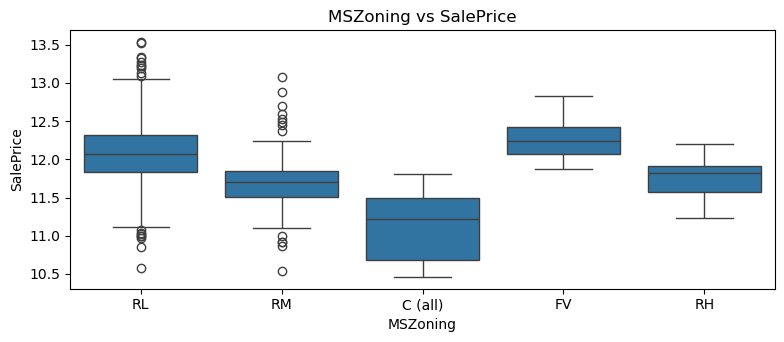

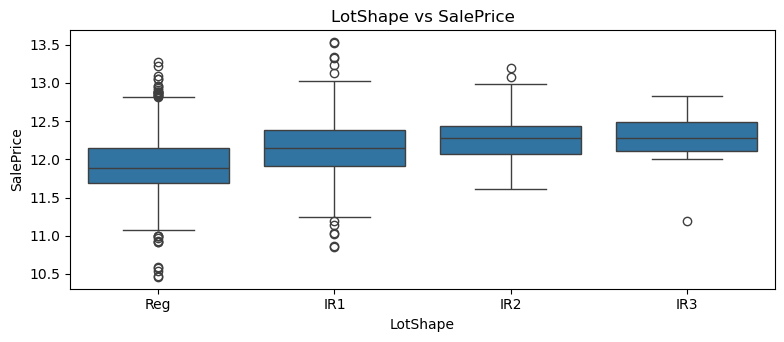

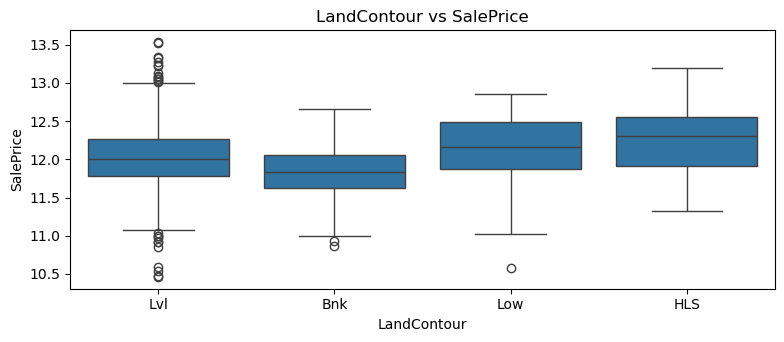

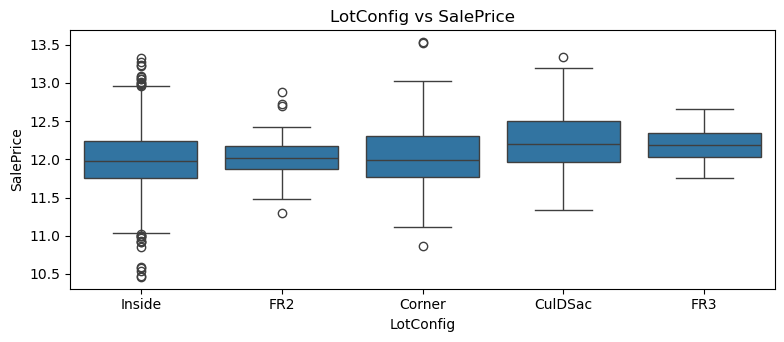

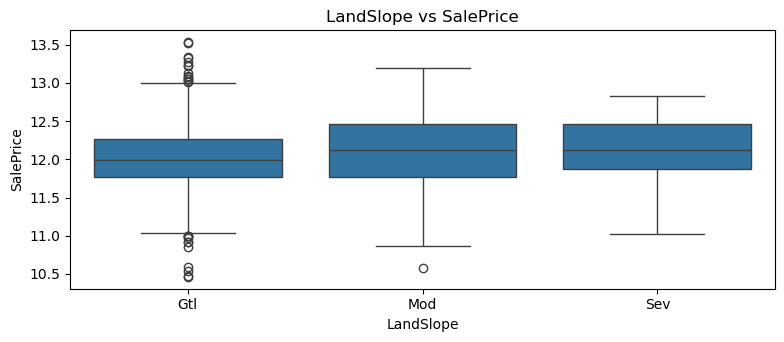

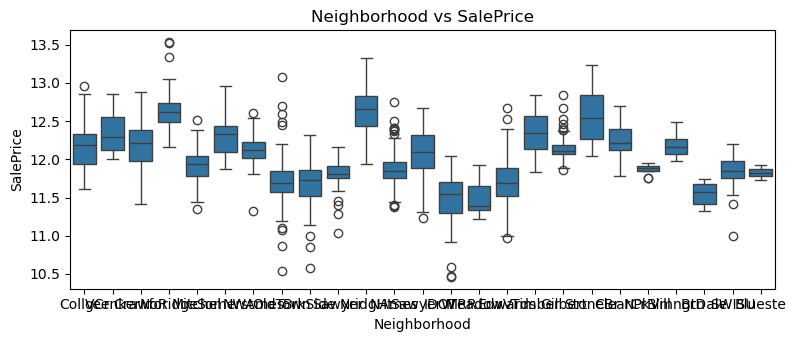

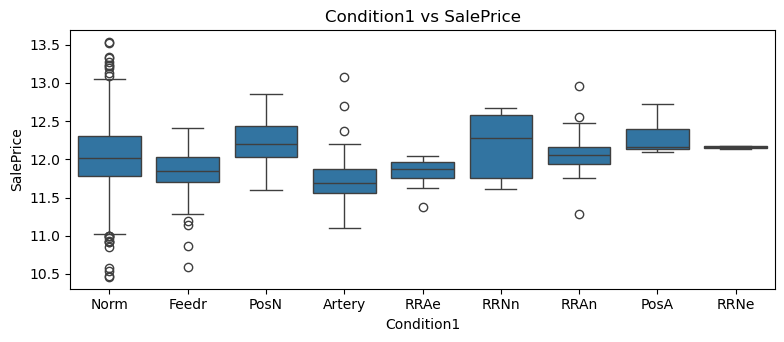

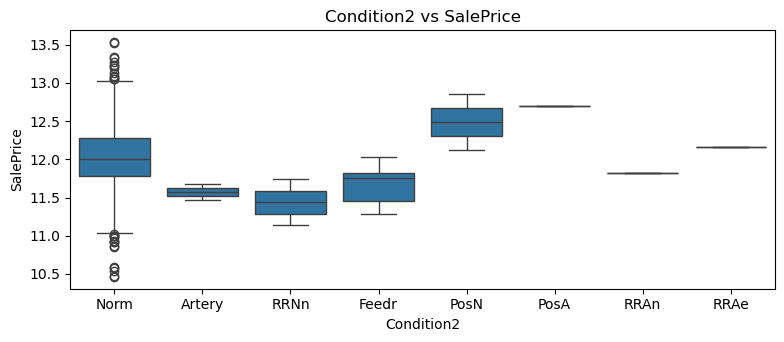

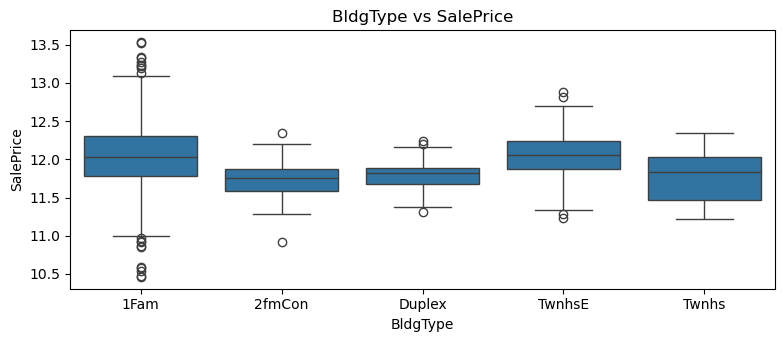

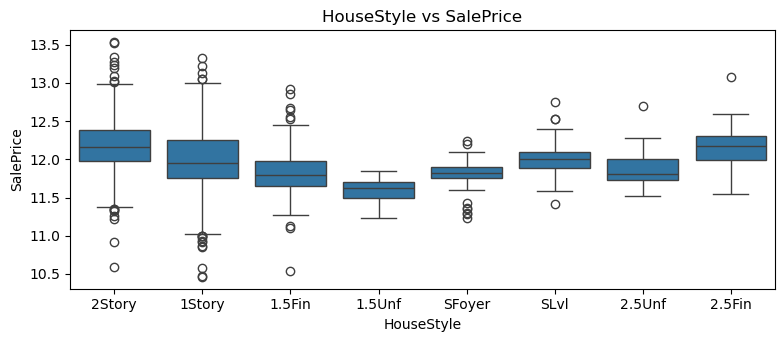

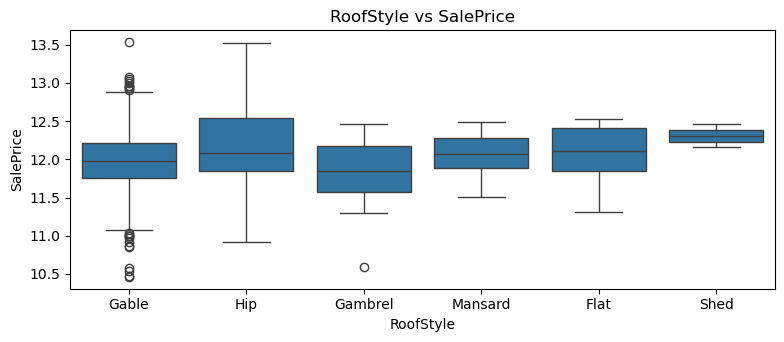

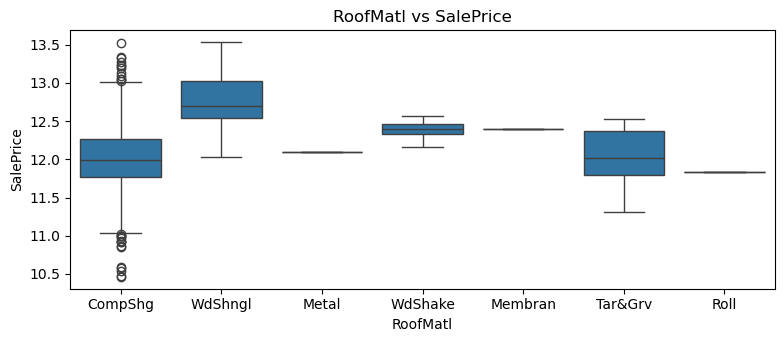

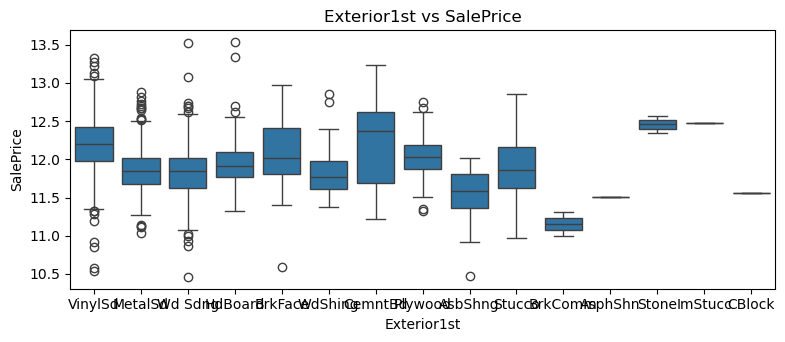

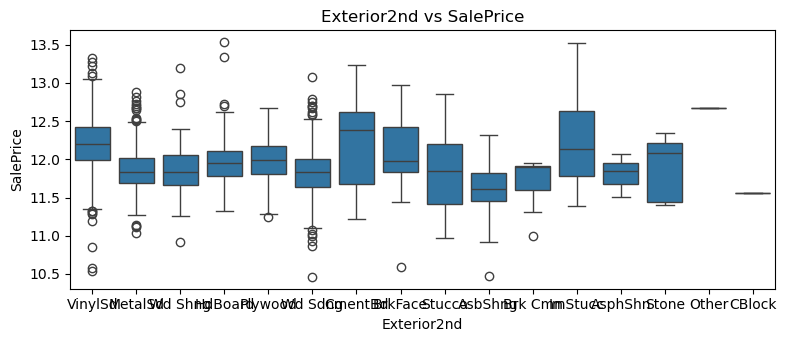

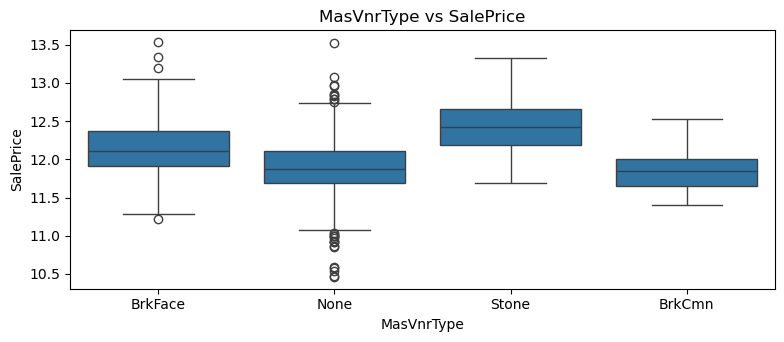

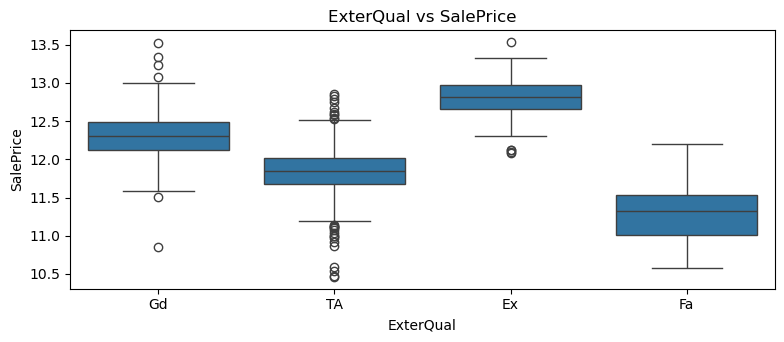

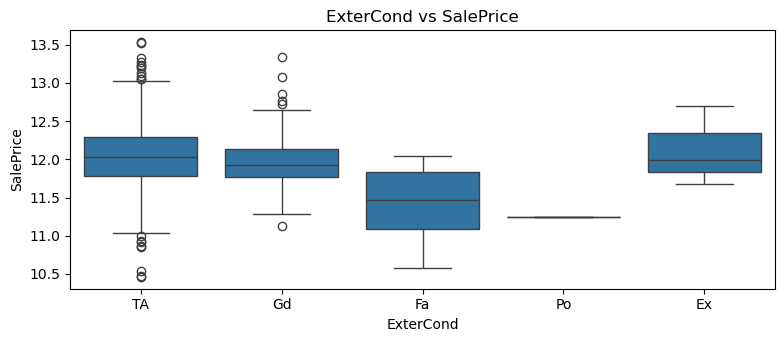

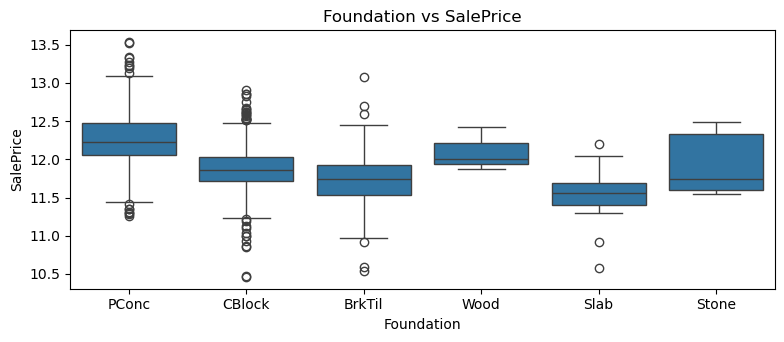

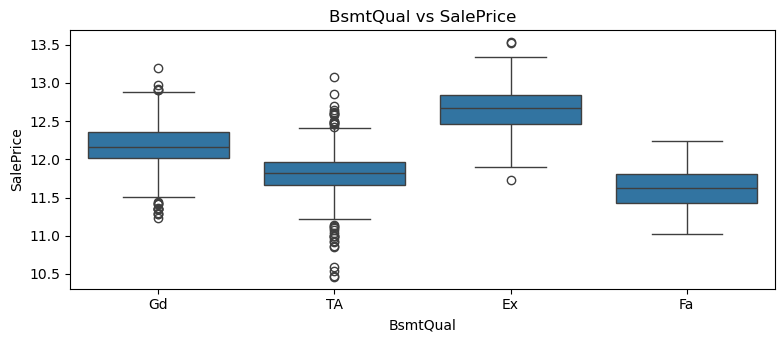

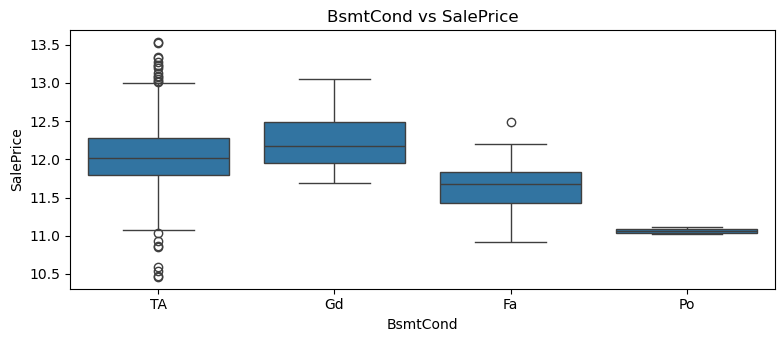

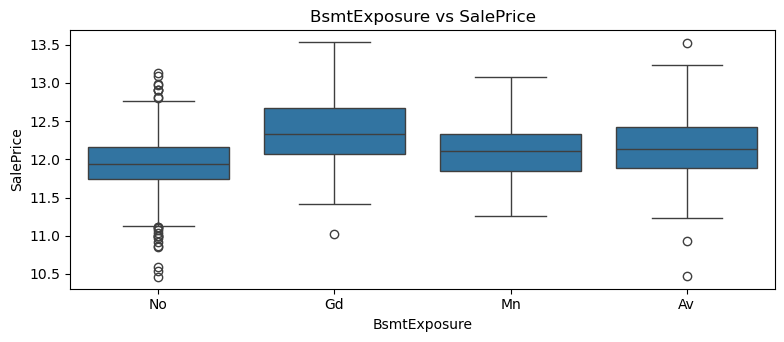

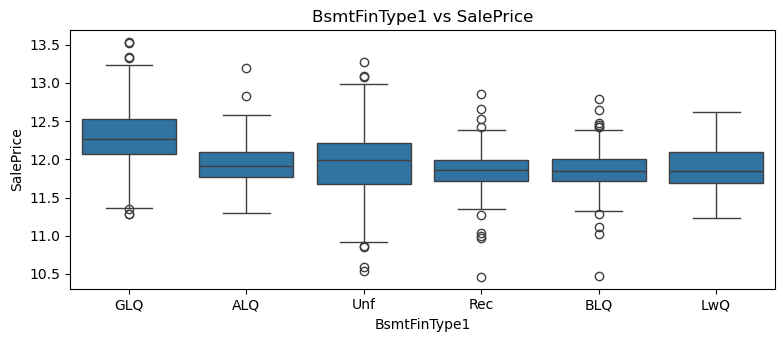

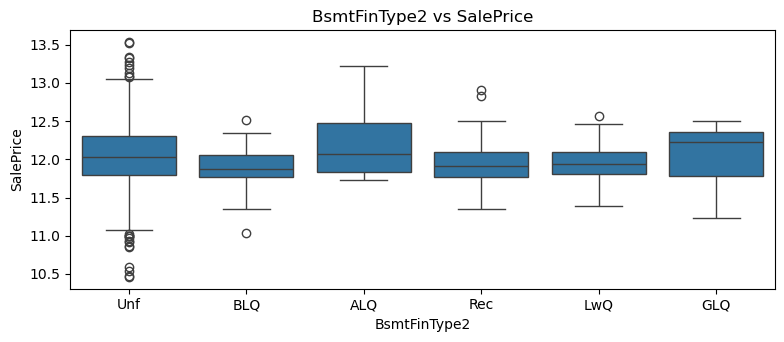

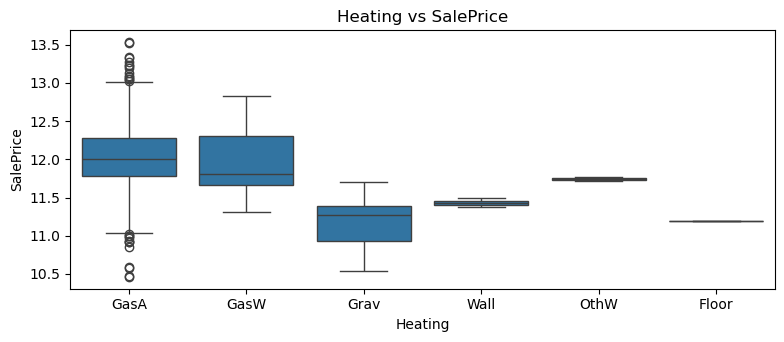

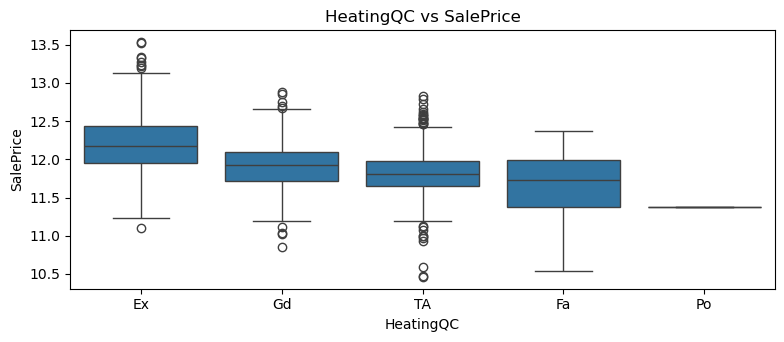

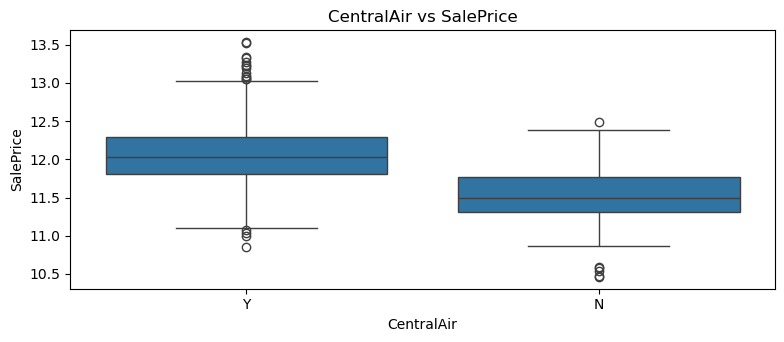

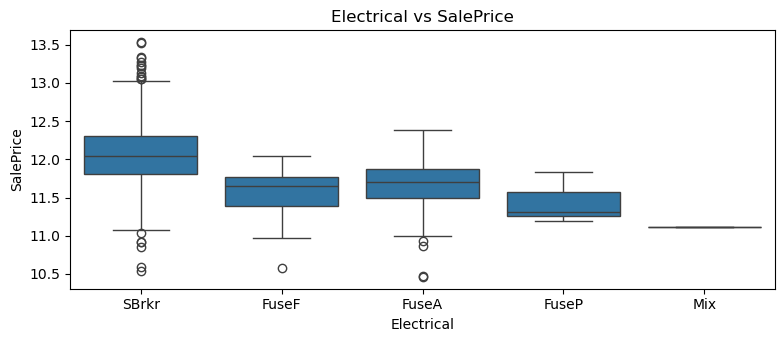

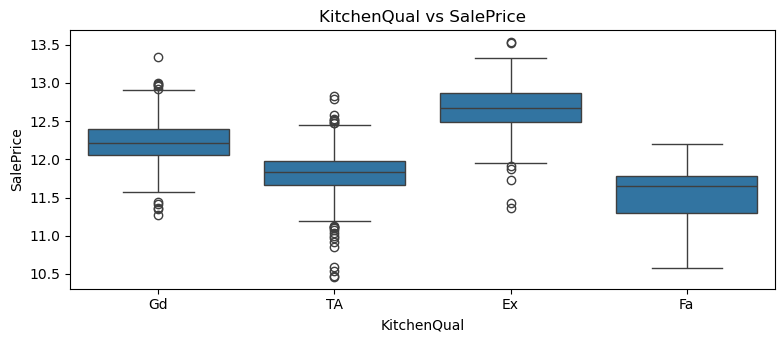

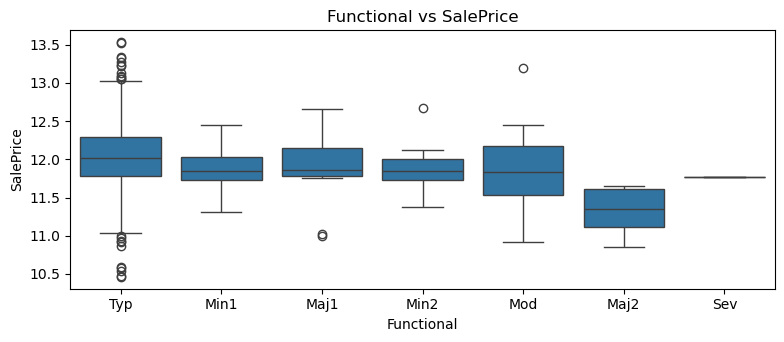

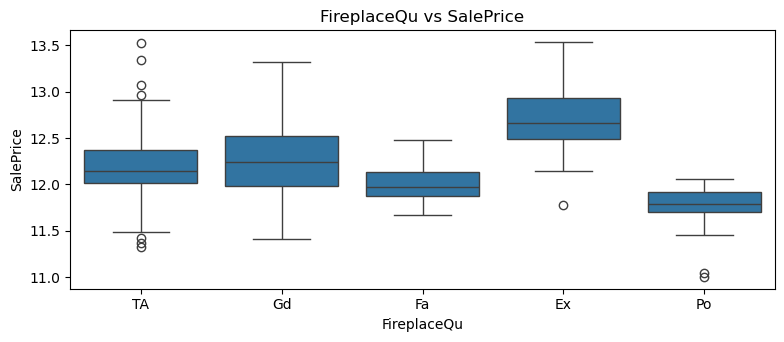

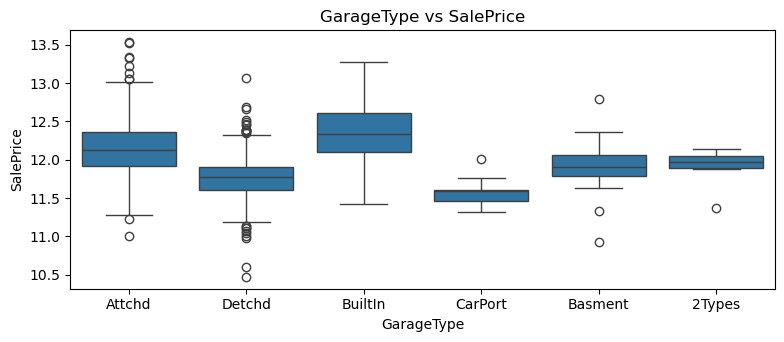

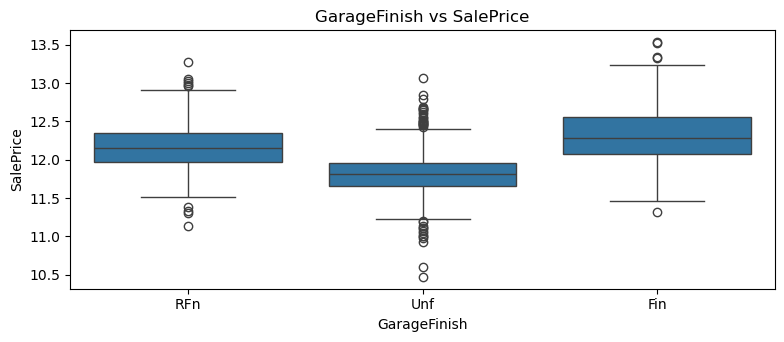

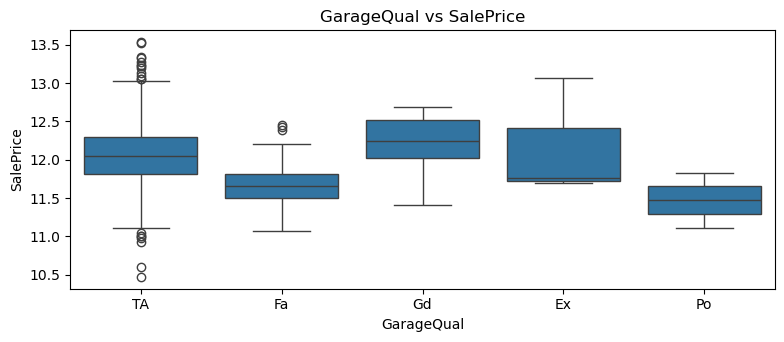

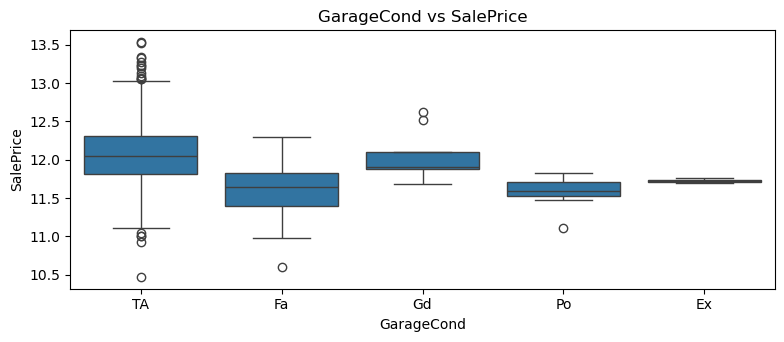

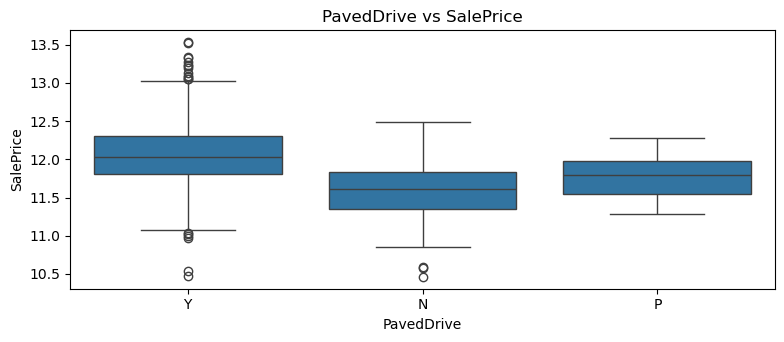

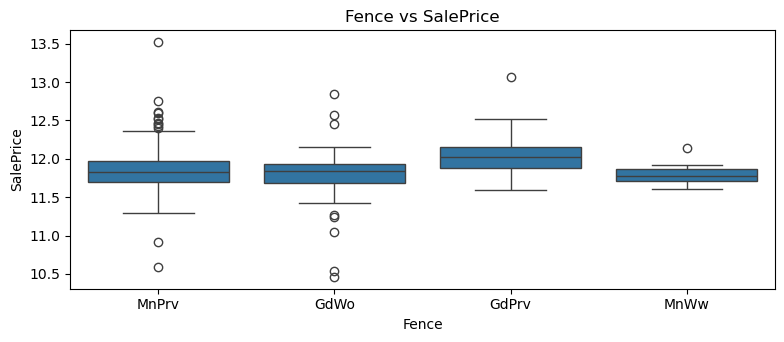

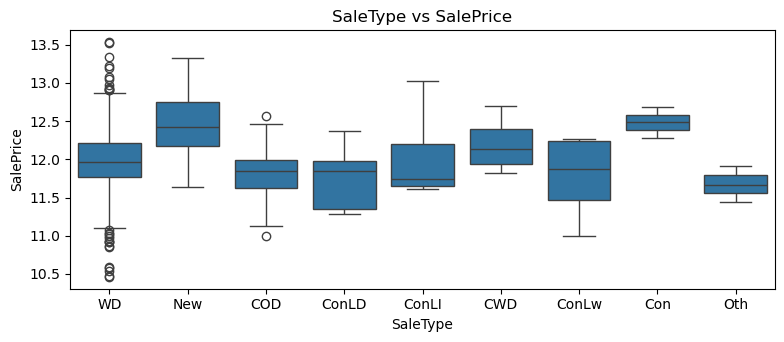

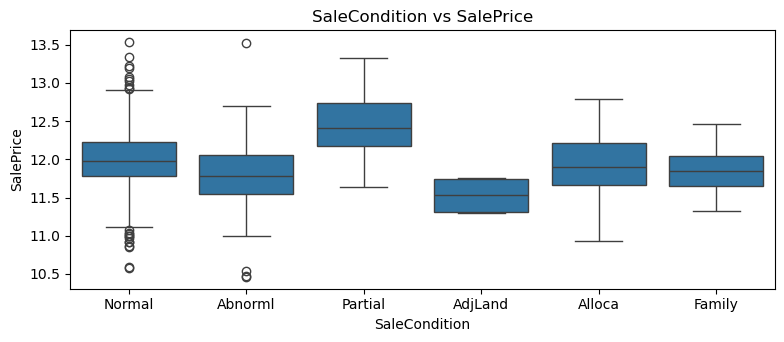

In [20]:
#Visualizing categorical variables as box plot
i=1
for col in house_df.columns:
    if(house_df[col].dtype=='object'):
        plt=plot(col, i, 'categorical')
        i=i+1
plt.show()
        


In [21]:
#Dropping rows with outliers
house_df.drop(house_df[(house_df['LotShape'] == 'IR1')  & (house_df['SalePrice'] > 700000)].index,inplace=True)

In [22]:
#scale all numberic columns
scaler = MinMaxScaler()
numerical_cols = []
for col in house_df.columns:
    if(house_df[col].dtype != 'object'):
        house_df[col]=scaler.fit_transform(np.array(house_df[col]).reshape(-1,1))
        numerical_cols.append(col)
     

In [23]:
# split the data into test and train
df_train, df_test=train_test_split(house_df, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1020, 66)
(438, 66)


In [ ]:
#find the correlation of variables on SalePrice and plot as heat map
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr('pearson'), cmap='YlGnBu', annot=True)
plt.show()

In [ ]:
#TotRmsAbvGrd and GrLivArea - 0.81
#GarageCars and GarageArea - 0.89
#TotalBsmtSF and 1stFlrSF - 0.82
#GarageCars and GarageYrBlt - 0.74
# Dropping the columns to avoid Multicollinearity
df_train=df_train.drop(['TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt' ], axis=1)
df_test=df_test.drop(['TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt' ], axis=1)


In [ ]:
#Label encoding for all categorical variables
le = LabelEncoder()

for col in df_train.columns:
    if(df_train[col].dtype=='object' ):
        df_train[col]=le.fit_transform(df_train[col])
        df_test[col] = le.fit_transform(df_test[col])

In [ ]:
#Correlation of SalePrice with all features
plt.figure(figsize=(15, 60))
heatmap = sns.heatmap(df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-0.5, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':12}, pad=16);

In [ ]:
# train dataset
y_train=df_train.pop('SalePrice')
X_train=df_train

In [ ]:
# test dataset
y_test=df_test.pop('SalePrice')
X_test=df_test

In [ ]:
df_train.head(10)

In [ ]:
# Linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

In [ ]:
# Reusable function to calculate r2score, RSS, MSE for each model
def  modelmetrics(y_train, y_pred_train, y_test, y_pred_test):
    metrics = []
    r2_score_train = r2_score(y_train, y_pred_train)
    metrics.append(r2_score_train)
    r2_score_test = r2_score(y_test, y_pred_test)
    metrics.append(r2_score_test)
   
    rss_train = np.sum(np.square(y_train- y_pred_train))
    metrics.append(rss_train)
    rss_test = np.sum(np.square(y_test- y_pred_test))
    metrics.append(rss_test)
    
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    metrics.append(mse_train**0.5)
    mse_test = mean_squared_error(y_test, y_pred_test)
    metrics.append(mse_test**0.5)

    return metrics

In [ ]:
#Predicting using Linear regression
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
lrmetrics = modelmetrics(y_train, y_pred_train, y_test, y_pred_test)

print(lrmetrics)



In [ ]:
# Test using RFE which columns are considered important
rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)


In [ ]:
columnsUsed = X_train.columns[rfe.support_]
columnsUsed

In [ ]:
#Ridge regression using cross validation, find optimum alpha
parameters = {'alpha':  [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]}

# define the estimator
ridge = Ridge()

# define the grid search
ridgemodel= GridSearchCV(estimator=ridge, param_grid=parameters, scoring='neg_mean_squared_error',cv=5, return_train_score=True, verbose=1)

#fit the grid search
ridgemodel.fit(X_train,y_train)

# best estimator
print(ridgemodel.best_estimator_)
print(ridgemodel.best_params_)

In [ ]:
# The optimum alpha is 0.5
ridge = Ridge(alpha=0.5) 
ridge.fit(X_train,y_train)
ridge_dict={}
for i,col in enumerate(X_train.columns): 
    ridge_dict[col]=round(ridge.coef_[i],4)


In [ ]:
#Metrics from Ridge Regression
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridgemetrics = modelmetrics(y_train, y_pred_train, y_test, y_pred_test)
print(ridgemetrics)


In [ ]:
#Lasso regression, find optimum alpha
parameters = {'alpha':  [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]}

# define the estimator
lasso = Lasso()

# define the grid search
lassomodel= GridSearchCV(estimator=lasso, param_grid=parameters, scoring='neg_mean_squared_error',cv=5, return_train_score=True, verbose=1)

#fit the grid search
lassomodel.fit(X_train,y_train)

# best estimator
print(lassomodel.best_estimator_)
print(lassomodel.best_params_)

In [ ]:
# The optimum alpha is 0.0001
lassomodel = Lasso(alpha=0.0001) 
lassomodel.fit(X_train,y_train)
lasso_dict={}
for i,col in enumerate(X_train.columns): 
    lasso_dict[col]=lassomodel.coef_[i]
  

In [ ]:
#Metrics from Lasso Regression
y_pred_train = lassomodel.predict(X_train)
y_pred_test = lassomodel.predict(X_test)

lassometrics = modelmetrics(y_train, y_pred_train, y_test, y_pred_test)
print(lassometrics)



In [ ]:
# Metrics from all models
table ={'Metrics Name': ['r2ScoreTrain','r2ScoreTest', 'RSSTrain', 'RSSTest', 'MSETrain', 'MSETest'], 
        'Linear Regression': lrmetrics,
       'Ridge Regression': ridgemetrics,
       'Lasso Regression': lassometrics}
metrics = pd.DataFrame(table, columns=['Metrics Name','Linear Regression',  'Ridge Regression',  'Lasso Regression'])
print(metrics)


In [ ]:
# Coefficients from all models
coeff = pd.DataFrame(index=X_train.columns)
coeff['Linear'] = lm.coef_
coeff['Ridge'] = ridge.coef_
coeff['Lasso']=lassomodel.coef_
print(coeff.count())
print(coeff)



In [ ]:
# Sort by Ridge coefficients
coeff.sort_values(by=['Ridge'], ascending=False)['Ridge']

In [ ]:
# sort by Lasso coefficients
coeff.sort_values(by=['Lasso'], ascending=False)['Lasso']

## After doubling the optimum alpha value for both Lasso and Ridge

In [ ]:
# The optimum alpha is 0.15 double the alpha
alpha= 0.5*2
ridge = Ridge(alpha=alpha) 
ridge.fit(X_train,y_train)
ridge_dict={}
for i,col in enumerate(X_train.columns): 
    ridge_dict[col]=round(ridge.coef_[i],4)

#Metrics from Ridge Regression
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridgemetrics = modelmetrics(y_train, y_pred_train, y_test, y_pred_test)
print(ridgemetrics)


In [ ]:
# The optimum alpha is 0.0001, double the alpha value
alpha = 0.0001*2
lassomodel = Lasso(alpha=alpha) 
lassomodel.fit(X_train,y_train)
lasso_dict={}
for i,col in enumerate(X_train.columns): 
    lasso_dict[col]=lassomodel.coef_[i]

#Metrics from Lasso Regression
y_pred_train = lassomodel.predict(X_train)
y_pred_test = lassomodel.predict(X_test)

lassometrics = modelmetrics(y_train, y_pred_train, y_test, y_pred_test)
print(lassometrics)


In [ ]:
# Metrics from all models
table ={'Metrics Name': ['r2ScoreTrain','r2ScoreTest', 'RSSTrain', 'RSSTest', 'MSETrain', 'MSETest'], 
        'Linear Regression': lrmetrics,
       'Ridge Regression': ridgemetrics,
       'Lasso Regression': lassometrics}
metrics = pd.DataFrame(table, columns=['Metrics Name','Linear Regression',  'Ridge Regression',  'Lasso Regression'])
print(metrics)


In [ ]:
lassomodel.coef_

## After dropping the significant features

In [ ]:
#Remove the five significant features assuming these features are not available in the dataset
cols_to_drop = ['GrLivArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'LotArea']
X_train_remove_significant = X_train.drop(cols_to_drop, axis=1)
X_test_remove_significant = X_test.drop(cols_to_drop, axis=1)

In [ ]:
#Lasso regression, find optimum alpha
parameters = {'alpha':  [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]}

# define the estimator
lasso = Lasso()

# define the grid search
lassomodel= GridSearchCV(estimator=lasso, param_grid=parameters, scoring='neg_mean_squared_error',cv=5, return_train_score=True, verbose=1)

#fit the grid search
lassomodel.fit(X_train_remove_significant,y_train)

# best estimator
print(lassomodel.best_estimator_)
print(lassomodel.best_params_)

In [ ]:
# The optimum alpha is 0.0001
alpha = 0.0001
lassomodel = Lasso(alpha=alpha) 
lassomodel.fit(X_train_remove_significant,y_train)
lasso_dict={}
for i,col in enumerate(X_train_remove_significant.columns): 
    lasso_dict[col]=lassomodel.coef_[i]

#Metrics from Lasso Regression
y_pred_train = lassomodel.predict(X_train_remove_significant)
y_pred_test = lassomodel.predict(X_test_remove_significant)

lassometrics = modelmetrics(y_train, y_pred_train, y_test, y_pred_test)
print(lassometrics)

In [ ]:
# Coefficients from Lasso
coeff = pd.DataFrame(index=X_train_remove_significant.columns)
coeff['Lasso']=lassomodel.coef_
# sort by Lasso coefficients
coeff.sort_values(by=['Lasso'], ascending=False)['Lasso']